In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get basic information
print(df.info())

# Summary statistics
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values (Note: In this dataset, missing values are represented by zero)
# Replace zero values with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Fill missing values with mean or median
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


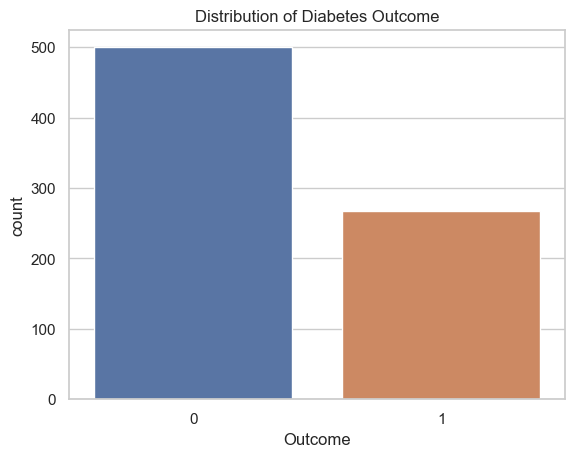

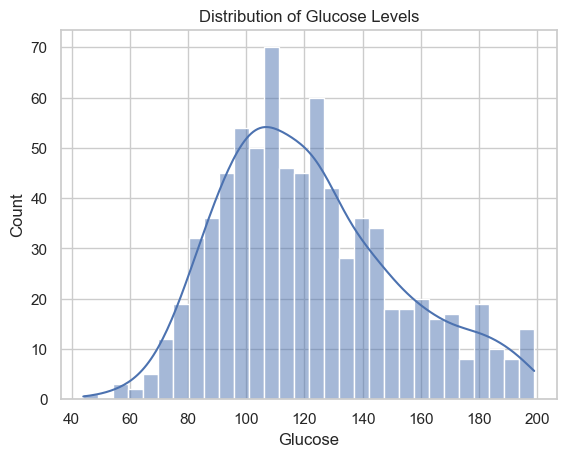

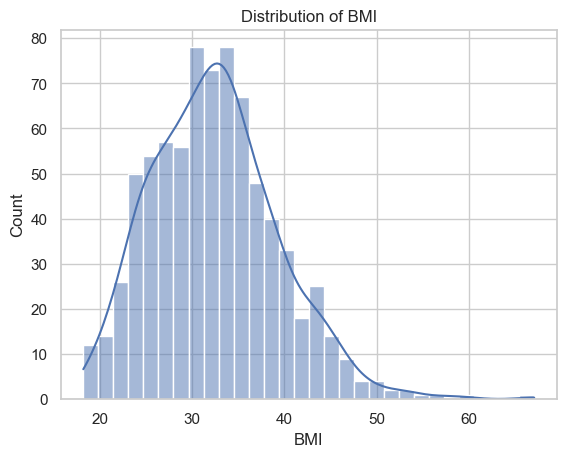

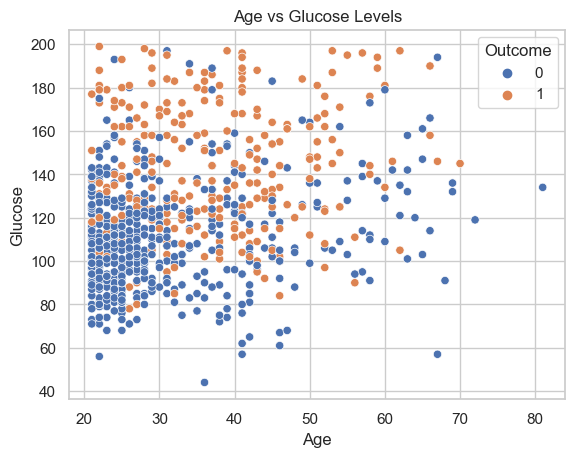

In [5]:
# Step 5: Data Visualization
# Distribution of outcome variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Distribution of glucose levels
sns.histplot(df['Glucose'], kde=True, bins=30)
plt.title('Distribution of Glucose Levels')
plt.show()

# Distribution of BMI
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.show()

# Relationship between age and glucose levels
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Age vs Glucose Levels')
plt.show()


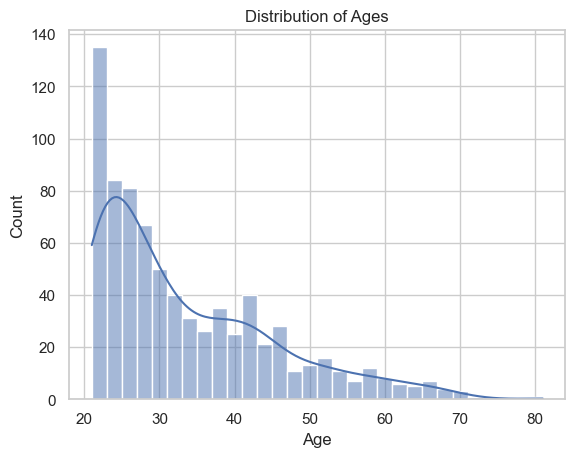

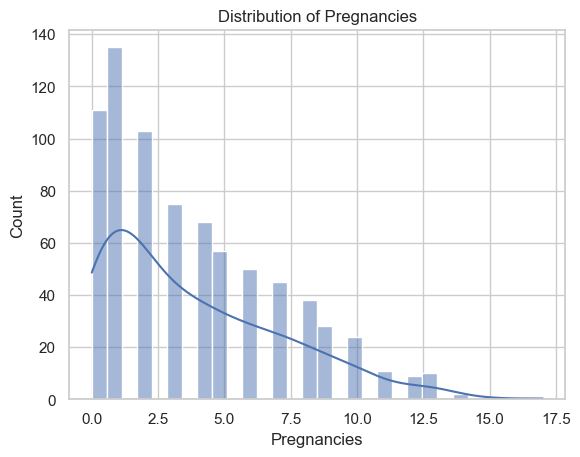

In [6]:
# Step 6: Univariate Analysis
# Distribution of Age
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Ages')
plt.show()

# Distribution of Pregnancies
sns.histplot(df['Pregnancies'], kde=True, bins=30)
plt.title('Distribution of Pregnancies')
plt.show()


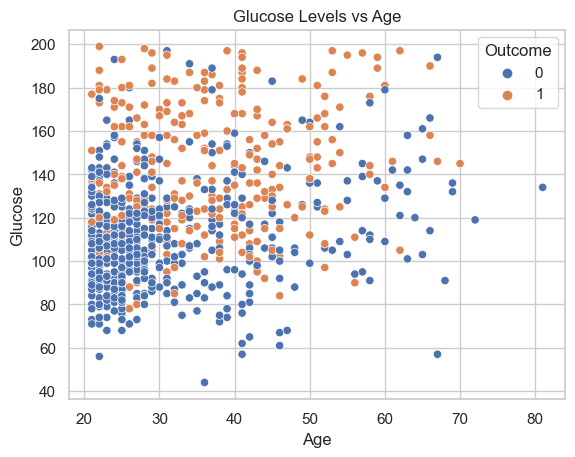

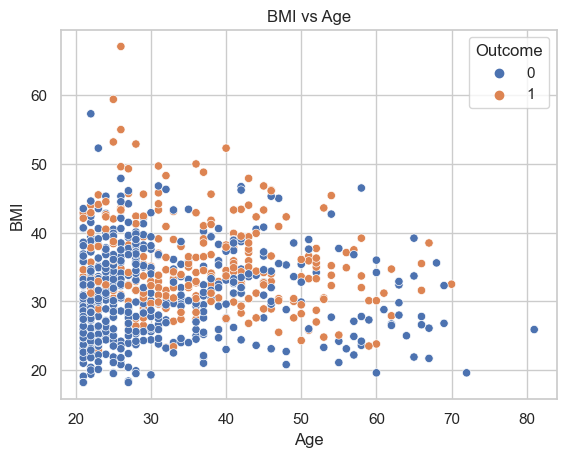

In [7]:
# Step 7: Bivariate Analysis
# Glucose levels vs Age
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Glucose Levels vs Age')
plt.show()

# BMI vs Age
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('BMI vs Age')
plt.show()


C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


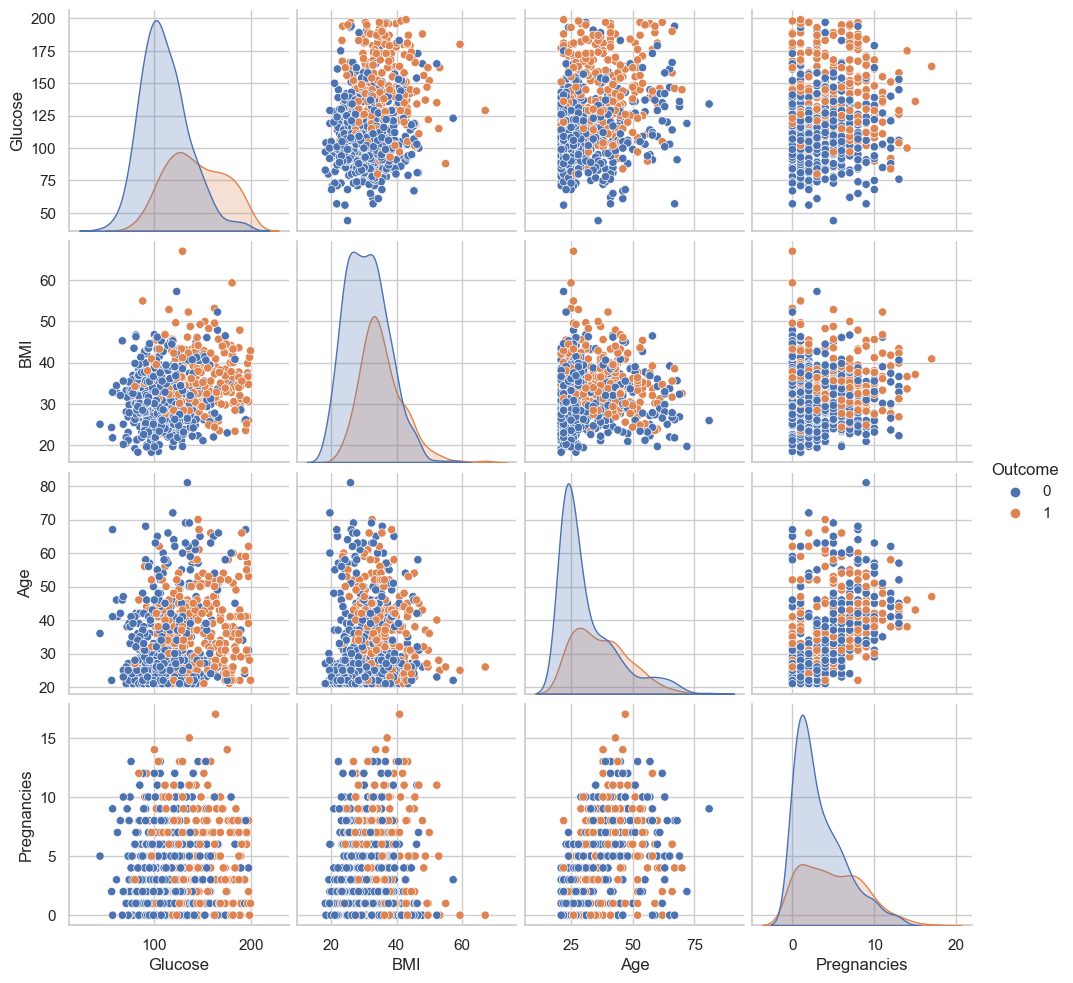

In [8]:
# Step 8: Multivariate Analysis
# Pair plot for selected features
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']], hue='Outcome')
plt.show()


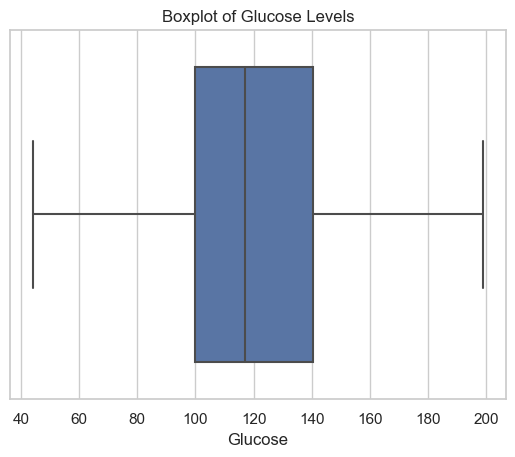

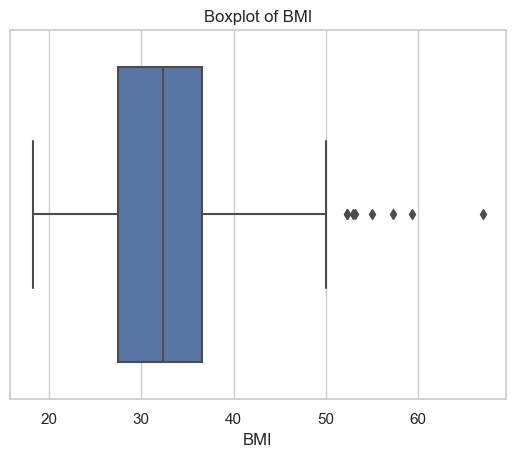

In [9]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in Glucose
sns.boxplot(x=df['Glucose'])
plt.title('Boxplot of Glucose Levels')
plt.show()

# Removing outliers from Glucose
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Glucose'] < (Q1 - 1.5 * IQR)) | (df['Glucose'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in BMI
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()


In [10]:
# Step 10: Feature Engineering
# Create additional features or normalize data if needed
# For example, normalize glucose levels
df['Glucose Normalized'] = (df['Glucose'] - df['Glucose'].mean()) / df['Glucose'].std()


In [11]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Outcome distribution
outcome_dist = df['Outcome'].value_counts()
print(f"Outcome Distribution:\n{outcome_dist}")

# Average glucose levels, BMI, and Age of patients
avg_glucose = df['Glucose'].mean()
avg_bmi = df['BMI'].mean()
avg_age = df['Age'].mean()
print(f"Average Glucose Level: {avg_glucose}")
print(f"Average BMI: {avg_bmi}")
print(f"Average Age: {avg_age}")

# Insights from scatter plots
print("The relationship between age, glucose levels, and BMI can provide insights into the factors contributing to diabetes.")


Key Insights:
Outcome Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Average Glucose Level: 121.68676277850591
Average BMI: 32.45520833333333
Average Age: 33.240885416666664
The relationship between age, glucose levels, and BMI can provide insights into the factors contributing to diabetes.


Findings:
1. Outcome Distribution: Understanding the distribution of diabetes outcomes provides insights into the prevalence of the condition in the dataset.
2. Glucose Levels and BMI: Analyzing the distribution of glucose levels and BMI helps in understanding their role in diabetes.
3. Age Trends: Identifying the age distribution and its relationship with glucose levels and BMI offers insights into the age groups most affected by diabetes.
4. Correlations: Understanding the relationships between age, glucose levels, BMI, and diabetes outcomes can help in analyzing the risk factors for diabetes.